<a href="https://colab.research.google.com/github/GabrielaRomoM/TAM-2025-2/blob/main/EjerciciosenClase/TAM_040925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [35]:
# import shutil
# shutil.rmtree('/content/TAM-2025-2')

# Carga de Imágenes

In [36]:
!git clone https://github.com/GabrielaRomoM/TAM-2025-2.git

Cloning into 'TAM-2025-2'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 139 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (139/139), 1.73 MiB | 17.23 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [21]:
# Función para cargar y redimensionar (al mismo tamaño para todas las imágenes)
def load_and_resize(path, size=(200,200)):
    img = Image.open(path).resize(size)
    return np.array(img)

# Cargar imágenes redimensionadas
face1 = load_and_resize('/content/TAM-2025-2/Tareas/Images/face1.jpg')
face2 = load_and_resize('/content/TAM-2025-2/Tareas/Images/face2.jpg')
face3 = load_and_resize('/content/TAM-2025-2/Tareas/Images/face3.jpg')

# Aplanar imágenes en vectores
vec1 = face1.flatten()
vec2 = face2.flatten()
vec3 = face3.flatten()

# Parte 1: Proyección Lineal con vectores

Proyección lineal en 2D con dos métodos:
1. Solución Analítica (Mínimos Cuadrados)
2. Solución Iterativa

## Cálculos para ambos métodos

In [40]:
# 1. DEFINICIÓN DE VECTORES
# Se busca proyectar el vector y (Xn) sobre la dirección definida por a (Xm)
y = np.array([3, 2])
a = np.array([5, 6])      # Nota: a no puede ser (0,0)

# Comprobación básica (evitar división por cero en la normalización)
if np.linalg.norm(a) < 1e-12:
    raise ValueError("El vector 'a' no puede ser el vector nulo.")

# Se reescribe de forma matricial
A = a.reshape(-1, 1)  # Es una matriz con una sola columna (a)


# 2. SOLUCIÓN ANALÍTICA (Mínimos Cuadrados)
'''
- Según la expresión teórica: α* = argmin ||y - αa||^2
    => α* = (a^T y) / (a^T a)
- En forma matricial, x* = (A^T A)^{-1} A^T y.
- La proyección es entonces: y_proj = A x*
'''
AtA = A.T @ A                       # escalar (1x1) en este caso
AtY = A.T @ y                       # escalar (1x1)
x_star_analitico = np.linalg.solve(AtA, AtY)  # equivalente a (AtA)^{-1} AtY
y_proj_analitico = (A @ x_star_analitico).ravel()


# 3. SOLUCIÓN ITERATIVA (Descenso por Gradiente)
'''
- Se define la función de costo: J(α) = ||y - αa||^2
- Su gradiente respecto a α es: dJ/dα = -2 a^T y + 2 α (a^T a)
- La regla de actualización iterativa es: α_{t+1} = α_t - η dJ/dα
'''
x_k = np.array([0.0])  # Inicialización (escalar porque el subespacio es 1D)
lr = 0.1 / (np.linalg.norm(A, 2) ** 2) # Tasa de Aprendizaje
max_iter = 20  #Número de iteraciones

# Se guarda el historial para visualizar trayectoria y convergencia
hist_x = [x_k.copy()]
hist_proj = [ (A @ x_k).ravel() ]

for it in range(max_iter):
    grad = A.T @ (A @ x_k - y)     # gradiente en el punto actual
    x_next = x_k - lr * grad       # actualización de trayectoria
    hist_x.append(x_next.copy())
    hist_proj.append( (A @ x_next).ravel() )
    x_k = x_next

# Se guarda el número de iteraciones y la solución iterativa final
iteraciones = len(hist_x) - 1
x_star_iter = x_k
y_proj_iter = (A @ x_star_iter).ravel()


# 4. RESULTADOS
# Se imprimen los resultados de ambas soluciones.
print("\n=== DATOS ===")
print(f"y (Xn)            = {y}")
print(f"a (Xm)            = {a}")
print("\n=== SOLUCIÓN ANALÍTICA  ===")
print(f"x*/α (analítico)  = {x_star_analitico[0]:.5f}")

print("\n=== SOLUCIÓN ITERATIVA ===")
print(f"iteraciones            = {iteraciones}")
print(f"LR utilizado           = {lr:.5e}")
print(f"x*/α (iterativo)       = {x_star_iter[0]:.5f}\n")


=== DATOS ===
y (Xn)            = [3 2]
a (Xm)            = [5 6]

=== SOLUCIÓN ANALÍTICA  ===
x*/α (analítico)  = 0.44262

=== SOLUCIÓN ITERATIVA ===
iteraciones            = 20
LR utilizado           = 1.63934e-03
x*/α (iterativo)       = 0.38881



## Proyección Vectorial en 2D

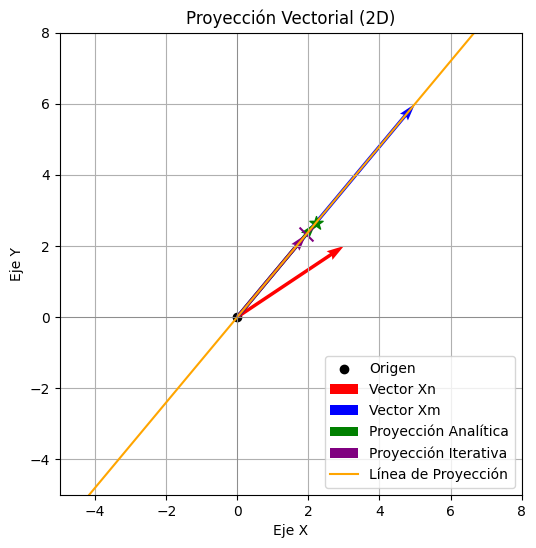

In [32]:
# 5. VISUALIZACIÓN GEOMÉTRICA EN 2D
'''
Se muestran: Vector original y (Xn), Vector base a (Xm),
Proyección analítica, Proyección iterativa y Recta que define el subespacio generado por a
'''

plt.figure(figsize=(6,6))
# Origen
plt.scatter(0, 0, c="black", label="Origen")
# Vector Xn (a proyectar)
plt.quiver(0, 0, y[0], y[1], angles="xy", scale_units="xy", scale=1,
           color="red", label="Vector Xn")
# Vector Xm (dirección de la recta)
plt.quiver(0, 0, a[0], a[1], angles="xy", scale_units="xy", scale=1,
           color="blue", label="Vector Xm")
# Proyección analítica (verde)
plt.quiver(0, 0, y_proj_analitico[0], y_proj_analitico[1], angles="xy",
           scale_units="xy", scale=1, color="green", label="Proyección Analítica")
plt.scatter(y_proj_analitico[0], y_proj_analitico[1], c="green", marker="*", s=100)
# Proyección iterativa (morado)
plt.quiver(0, 0, y_proj_iter[0], y_proj_iter[1], angles="xy",
           scale_units="xy", scale=1, color="purple", label="Proyección Iterativa")
plt.scatter(y_proj_iter[0], y_proj_iter[1], c="purple", marker="x", s=100)
# Línea de proyección (span de a)
t = np.linspace(-5, 5, 100)
line_points = np.outer(t, a)
plt.plot(line_points[:,0], line_points[:,1], color="orange", label="Línea de Proyección")

# Configuración del plano
plt.axhline(0, color="gray", linewidth=0.5) ; plt.axvline(0, color="gray", linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-5, 8) ; plt.ylim(-5, 8)
plt.xlabel("Eje X"); plt.ylabel("Eje Y")
plt.title("Proyección Vectorial (2D)")
plt.legend(); plt.grid(True); plt.show()

## Visualización función de costo

Mínimo analítico = 0.44262

Mínimo iterativo = 0.38881



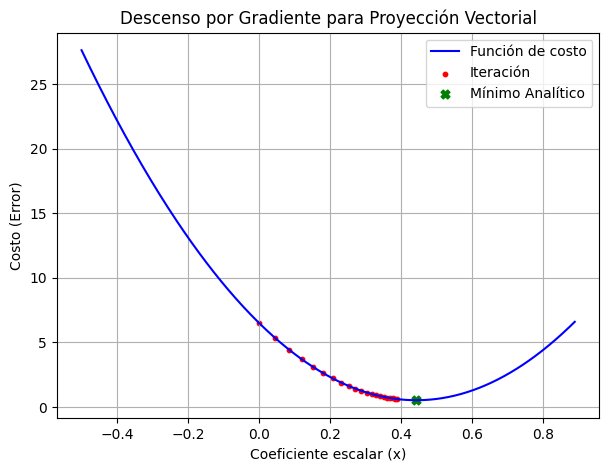

In [37]:
# 6. VISUALIZACIÓN DE LA FUNCIÓN DE COSTO (parábola)
'''
Se visualiza
  - Curva de la parábola
  - Puntos recorridos en cada iteración del descenso por gradiente
  - Mínimo analítico
'''

# Extraer escalares (xs) de las iteraciones
xs_iter = np.array([float(xi.item()) for xi in hist_x])
# Calcular costo en cada iteración
costs_iter = np.array([
    0.5 * np.linalg.norm(A @ np.array([x_k]) - y)**2
    for x_k in xs_iter
])

# Construir parábola en un rango centrado en el óptimo
x_min = min(xs_iter) - 0.5; x_max = max(xs_iter) + 0.5
x_range = np.linspace(x_min, x_max, 400)
cost_range = [0.5 * np.linalg.norm(A @ np.array([xx]) - y)**2 for xx in x_range]

# Mínimo analítico (óptimo)
x_opt = float(x_star_analitico[0])
cost_opt = 0.5 * np.linalg.norm(A @ np.array([x_opt]) - y)**2

# Vectores
print(f"Mínimo analítico = {x_opt:.5f}\n"); print(f"Mínimo iterativo = {float(x_k[0]):.5f}\n")

# Graficar
plt.figure(figsize=(7,5))
plt.plot(x_range, cost_range, label="Función de costo", color="blue")
# Puntos de iteración (rojos)
plt.scatter(xs_iter, costs_iter, color="red", marker=".", s=40, label= "Iteración")
# Punto mínimo analítico (verde)
plt.scatter(x_opt, cost_opt, color="green", marker="X", s=40, label="Mínimo Analítico")

plt.xlabel("Coeficiente escalar (x)"); plt.ylabel("Costo (Error)")
plt.title("Descenso por Gradiente para Proyección Vectorial")
plt.legend(); plt.grid(True); plt.show()

# Parte 2: Proyección Lineal con Imágenes

Proyección líneal de dos imágenes con dos métodos:
1. Solución Analítica (Solo cálculo de α)
2. Solución Iterativa (Incluye gráfica de función de costo)

## Cálculos para ambos métodos

In [38]:
# 1. DEFINICIÓN DE VECTORES
'''
En este caso se proyecta el vector 'vec1' (imagen 1 en forma vectorial)
sobre la dirección definida por 'vec2' (imagen 2 en forma vectorial).
Es decir, buscamos α que minimice ||y - αa||^2, donde y = vec1 y a = vec2.
'''
y1 = vec1.astype(float)   # vector a proyectar
a1 = vec2.astype(float)   # dirección del subespacio (no puede ser nulo)

# Validación para evitar el vector nulo
if np.linalg.norm(a1) < 1e-12:
    raise ValueError("El vector 'a' no puede ser el vector nulo.")

# Se reescribe de forma matricial
A1 = a1.reshape(-1, 1) # A es una matriz con una sola columna (el vector a)


# 2. SOLUCIÓN ANALÍTICA (mínimos cuadrados)
'''
De la teoría:
  α* = argmin ||y - αa||^2
  => α* = (a^T y) / (a^T a)
En forma matricial general: x* = (A^T A)^{-1} A^T y
La proyección se obtiene como: y_proj = A x*
'''
AtA_1 = A1.T @ A1
AtY_1 = A1.T @ y1
x_star_analitico_1 = np.linalg.solve(AtA_1, AtY_1)  # escalar óptimo
y_proj_analitico_1 = (A1 @ x_star_analitico_1).ravel()


# 3. SOLUCIÓN ITERATIVA (descenso por gradiente)
'''
Se define la función de costo: J(α) = ||y - αa||^2
Gradiente respecto a α: dJ/dα = -2 a^T y + 2 α (a^T a)
Regla de actualización: α_{t+1} = α_t - η dJ/dα
'''
x_k_1 = np.array([0.0])  # inicialización del escalar
lr_1 = 0.1 / (np.linalg.norm(A1, 2) ** 2) # Tasa de aprendizaje establecida en función de ||A||^2
tol = 1e-10
max_iter_1 = 50

# Historial para visualizar trayectoria de convergencia
hist_x_1 = [x_k_1.copy()]

for it in range(max_iter_1):
    grad1 = A1.T @ (A1 @ x_k_1 - y1)   # gradiente en el punto actual
    x_next_1 = x_k_1 - lr_1 * grad1     # actualización de trayectoria
    hist_x_1.append(x_next_1.copy())
    if np.linalg.norm(x_next_1 - x_k_1) < tol:
        x_k_1= x_next_1
        break
    x_k_1 = x_next_1

# Resultado de la solución iterativa
iteraciones1 = len(hist_x_1) - 1
x_star_iter1 = x_k_1
y_proj_iter1 = (A1 @ x_star_iter1).ravel()

# 4. RESULTADOS
print("\n=== DATOS ===")
print(f"y (Imagen 1)            = {y}")
print(f"a (Imagen 2)            = {a}")
print("\n=== SOLUCIÓN ANALÍTICA ===")
print(f"x*/α (analítico)        = {x_star_analitico_1[0]:.5f}")

print("\n=== SOLUCIÓN ITERATIVA ===")
print(f"iteraciones            = {iteraciones1}")
print(f"LR utilizado           = {lr_1:.5e}")
print(f"x*/α (iterativo)       = {x_star_iter1[0]:.5f}")


=== DATOS ===
y (Imagen 1)            = [3 2]
a (Imagen 2)            = [5 6]

=== SOLUCIÓN ANALÍTICA ===
x*/α (analítico)        = 1.07301

=== SOLUCIÓN ITERATIVA ===
iteraciones            = 50
LR utilizado           = 3.82499e-11
x*/α (iterativo)       = 1.06748


## Visualización función de costo

Mínimo analítico = 1.07301

Mínimo iterativo = 1.06748



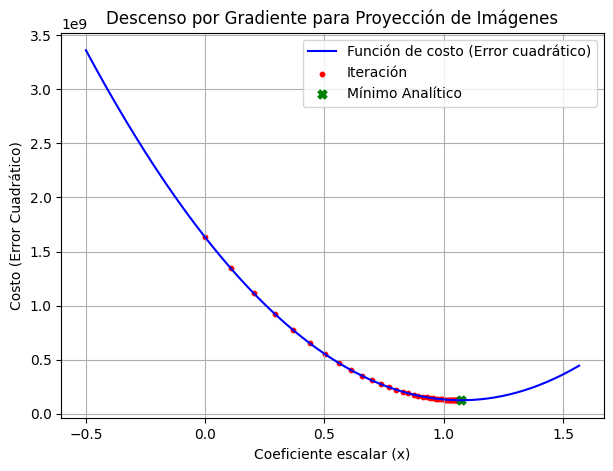

In [39]:
# 5. VISUALIZACIÓN PARABÓLICA DEL COSTO
'''
Se grafican:
  - La curva de la función de costo
  - Los puntos alcanzados en cada iteración del descenso por gradiente
  - El mínimo analítico (punto óptimo).
'''
# Extraer xs escalares de las iteraciones
xs_iter1 = np.array([float(xi1.item()) for xi1 in hist_x_1])
# Calcular costo en cada iteración
costs_iter1 = np.array([
    0.5 * np.linalg.norm(A1 @ np.array([x_k_1]) - y1)**2
    for x_k_1 in xs_iter1
])

# Construcción de la parábola en un rango centrado en las iteraciones
x_min1 = min(xs_iter1) - 0.5; x_max1 = max(xs_iter1) + 0.5
x_range1 = np.linspace(x_min1, x_max1, 200)
cost_range1 = [0.5 * np.linalg.norm(A1 @ np.array([xx1]) - y1)**2 for xx1 in x_range1]
# Punto mínimo analítico
x_opt1 = float(x_star_analitico_1[0])
cost_opt1 = 0.5 * np.linalg.norm(A1 @ np.array([x_opt1]) - y1)**2

# Vectores
print(f"Mínimo analítico = {x_opt1:.5f}\n"); print(f"Mínimo iterativo = {float(x_k_1[0]):.5f}\n")

# Graficar
plt.figure(figsize=(7,5))
plt.plot(x_range1, cost_range1, label="Función de costo (Error cuadrático)", color="blue")

# Puntos de iteración (rojos)
plt.scatter(xs_iter1, costs_iter1, color="red", marker=".", s=40, label="Iteración")
# Punto mínimo analítico (verde)
plt.scatter(x_opt1, cost_opt1, color="green", marker="X", s=40, label="Mínimo Analítico")

plt.xlabel("Coeficiente escalar (x)"); plt.ylabel("Costo (Error Cuadrático)")
plt.title("Descenso por Gradiente para Proyección de Imágenes")
plt.legend(); plt.grid(True); plt.show()